# Pulsar Prediction Data Wrangling and Visualization

In [1]:
# Import necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# Import data sets

In [4]:
pulsar_train = pd.read_csv("pulsar_data_train.csv")
pulsar_test = pd.read_csv("pulsar_data_test.csv")
pulsar = pd.read_csv("pulsar.csv")

In [5]:
pulsar_clean = pd.read_csv("pulsar.csv")

In [6]:
pulsar_train.shape

(12528, 9)

In [7]:
12528 + 5370

17898

In [8]:
12528/17898

0.6999664767013074

In [9]:
pulsar_test.shape

(5370, 9)

In [10]:
pulsar_clean.shape

(17898, 9)

In [11]:
pulsar_clean

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [12]:
pulsar_train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [13]:
pulsar_test

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


In [14]:
# Taking a look at the data sets

In [15]:
pulsar_train.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0


In [16]:
pulsar_test.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
5,85.476562,38.052793,NaN,1.915097,2.637124,NaN,9.001500,NaN,NaN
6,120.203125,46.946339,0.028301,0.227984,2.925585,15.006252,8.077168,91.100734,NaN
7,131.921875,48.328564,NaN,0.071303,4.380435,26.619201,6.530845,43.515761,NaN
8,124.078125,50.514789,0.241397,-0.433412,2.459030,17.354146,8.790638,86.443885,NaN
9,115.789062,55.597135,-0.030940,-0.688146,2.112876,11.902606,10.952806,184.479712,NaN


In [17]:
pulsar.head(10)

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [18]:
# I'll count the NaN values.

In [19]:
pulsar_train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [20]:
pulsar_test.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

In [21]:
pulsar.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [22]:
# Some columns in pulsar_train and pulsar_test have NaN values. These will be noted and will be addressed later. 
# The pulsar_test set has missing values under the test column. 
# This is to be expected, and will be filled after the model is created. 

# Check the data types for each variable.

In [23]:
pulsar_train.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [24]:
pulsar_test.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [25]:
pulsar.dtypes

Mean_Integrated         float64
SD                      float64
EK                      float64
Skewness                float64
Mean_DMSNR_Curve        float64
SD_DMSNR_Curve          float64
EK_DMSNR_Curve          float64
Skewness_DMSNR_Curve    float64
Class                     int64
dtype: object

In [26]:
# All the data is numerical. 

In [27]:
# Describe the data sets.

In [28]:
pulsar_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [29]:
pulsar_test.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,5370.000000,5370.000000,4603.000000,5370.000000,5370.000000,4846.000000,5370.000000,5126.000000,0.0
mean,111.168917,46.615074,0.483676,1.751260,12.473587,26.425371,8.233724,102.869088,NaN
std,25.608635,6.940638,1.076893,6.072820,29.145134,19.384489,4.435683,104.748418,NaN
min,6.179688,24.791612,-1.876011,-1.764717,0.213211,7.370432,-2.721857,-1.964998,NaN
25%,101.041016,42.408020,0.030643,-0.189557,1.956522,14.555826,5.700461,33.817330,NaN
50%,114.757812,47.031304,0.227314,0.186468,2.830686,18.549670,8.383695,81.392046,NaN
75%,127.023438,51.133444,0.475056,0.918807,5.590301,28.681787,10.632265,136.893502,NaN
max,192.617188,98.778911,7.608370,65.385974,223.392141,109.712649,34.539844,1191.000837,NaN


In [30]:
pulsar.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [31]:
# For the NaN values, I'm going to find the mean for each column and replace the NaN with that. 

In [32]:
# List the mean values. 

In [33]:
pulsar_train.mean()

 Mean of the integrated profile                  111.041841
 Standard deviation of the integrated profile     46.521437
 Excess kurtosis of the integrated profile         0.478548
 Skewness of the integrated profile                1.778431
 Mean of the DM-SNR curve                         12.674758
 Standard deviation of the DM-SNR curve           26.351318
 Excess kurtosis of the DM-SNR curve               8.333489
 Skewness of the DM-SNR curve                    105.525779
target_class                                       0.092034
dtype: float64

In [34]:
pulsar_test.mean()

 Mean of the integrated profile                  111.168917
 Standard deviation of the integrated profile     46.615074
 Excess kurtosis of the integrated profile         0.483676
 Skewness of the integrated profile                1.751260
 Mean of the DM-SNR curve                         12.473587
 Standard deviation of the DM-SNR curve           26.425371
 Excess kurtosis of the DM-SNR curve               8.233724
 Skewness of the DM-SNR curve                    102.869088
target_class                                            NaN
dtype: float64

In [35]:
# Create a new data frame.

In [36]:
pulsar_tr_drop = pulsar_train

In [37]:
pulsar_ts_drop = pulsar_test

mean_value = pulsar_train['Excess kurtosis of the integrated profile'].mean()

In [38]:
# pulsar_train[‘Excess kurtosis of the integrated profile’].fillna(value=pulsar_train[‘Excess kurtosis of the integrated profile’].mean(), inplace=True)

# I kept getting errors when I tried to fill NaN values here.
# I found a better dataset so I didn't need to keep trying this. 

In [39]:
# mean_value = pulsar_train['Excess kurtosis of the integrated profile'].mean()

In [40]:
# mean_value = pulsar_train['Excess kurtosis of the integrated profile'].mean()

In [41]:
# Histogram Visualization

In [42]:
# mean_value = pulsar_train['Excess kurtosis of the integrated profile'].mean()

array([[<AxesSubplot:title={'center':' Mean of the integrated profile'}>,
        <AxesSubplot:title={'center':' Standard deviation of the integrated profile'}>,
        <AxesSubplot:title={'center':' Excess kurtosis of the integrated profile'}>],
       [<AxesSubplot:title={'center':' Skewness of the integrated profile'}>,
        <AxesSubplot:title={'center':' Mean of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Standard deviation of the DM-SNR curve'}>],
       [<AxesSubplot:title={'center':' Excess kurtosis of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Skewness of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':'target_class'}>]], dtype=object)

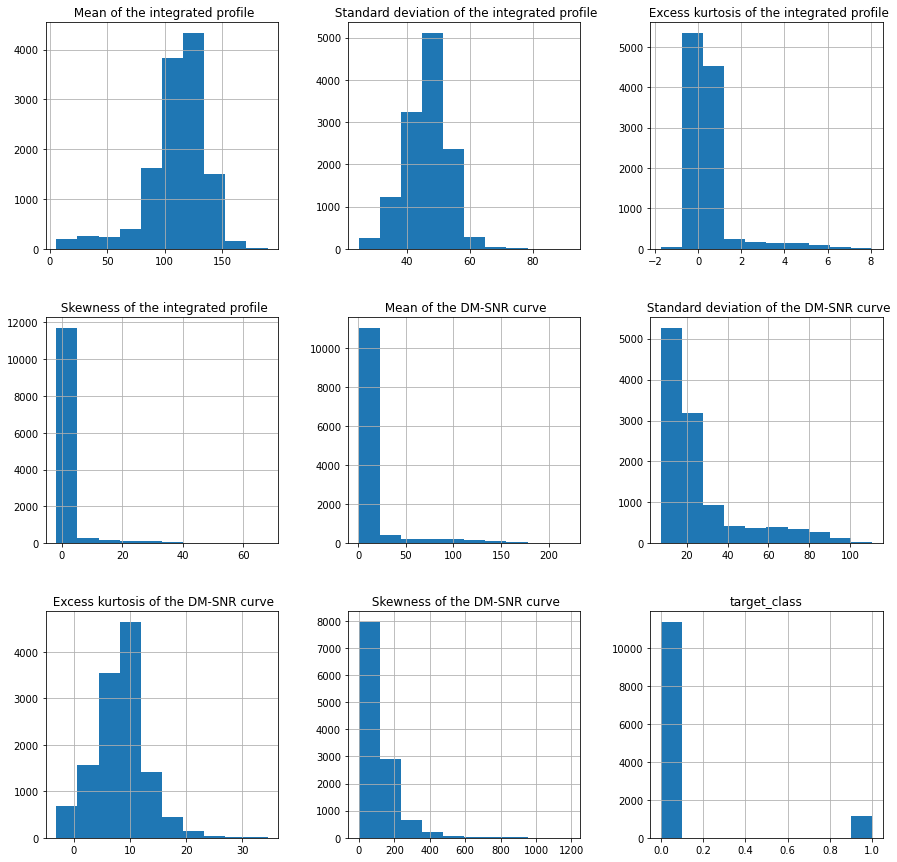

In [43]:
pulsar_train.hist(figsize=(15,15))

array([[<AxesSubplot:title={'center':' Mean of the integrated profile'}>,
        <AxesSubplot:title={'center':' Standard deviation of the integrated profile'}>,
        <AxesSubplot:title={'center':' Excess kurtosis of the integrated profile'}>],
       [<AxesSubplot:title={'center':' Skewness of the integrated profile'}>,
        <AxesSubplot:title={'center':' Mean of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Standard deviation of the DM-SNR curve'}>],
       [<AxesSubplot:title={'center':' Excess kurtosis of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':' Skewness of the DM-SNR curve'}>,
        <AxesSubplot:title={'center':'target_class'}>]], dtype=object)

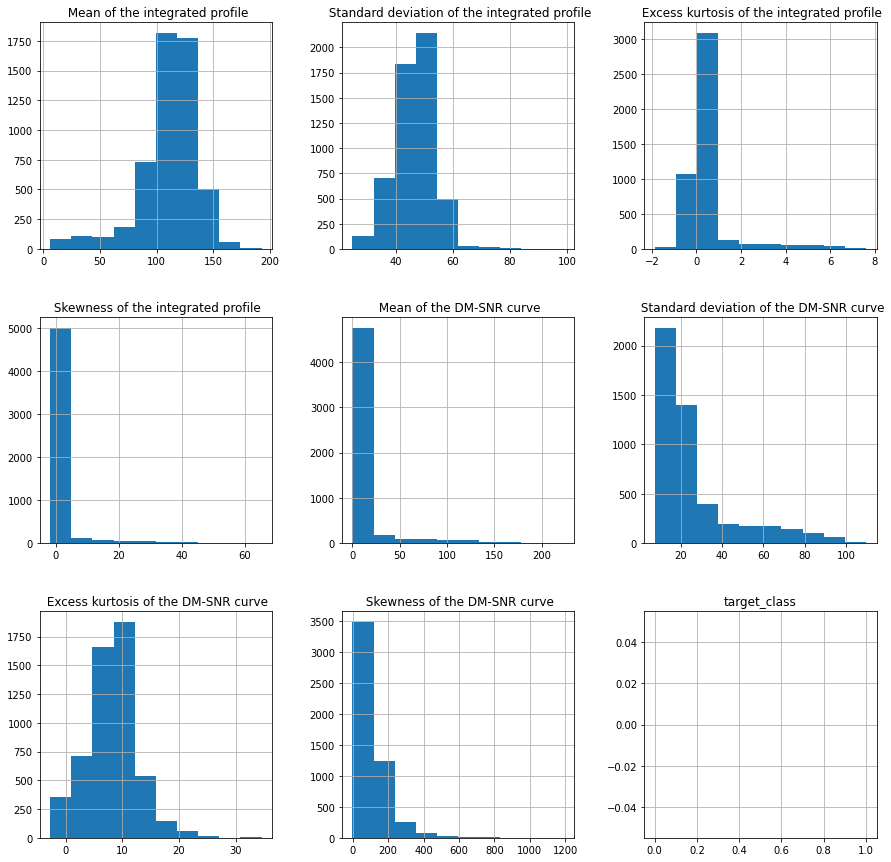

In [44]:
pulsar_test.hist(figsize=(15,15))

array([[<AxesSubplot:title={'center':'Mean_Integrated'}>,
        <AxesSubplot:title={'center':'SD'}>,
        <AxesSubplot:title={'center':'EK'}>],
       [<AxesSubplot:title={'center':'Skewness'}>,
        <AxesSubplot:title={'center':'Mean_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'SD_DMSNR_Curve'}>],
       [<AxesSubplot:title={'center':'EK_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'Skewness_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

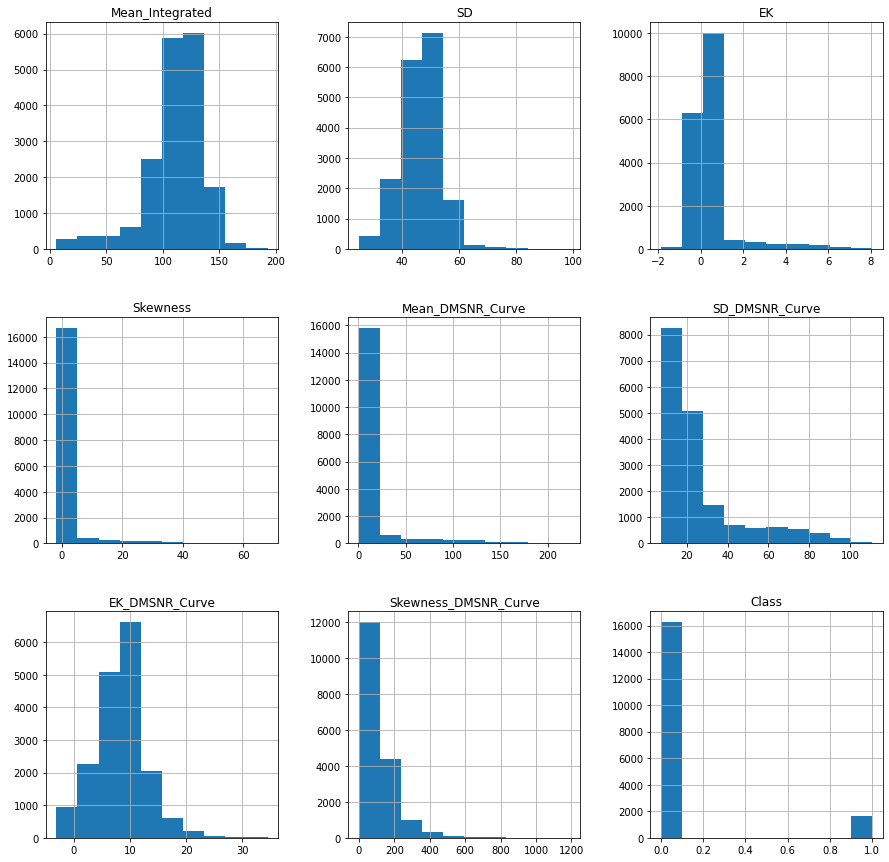

In [45]:
pulsar.hist(figsize=(15,15))

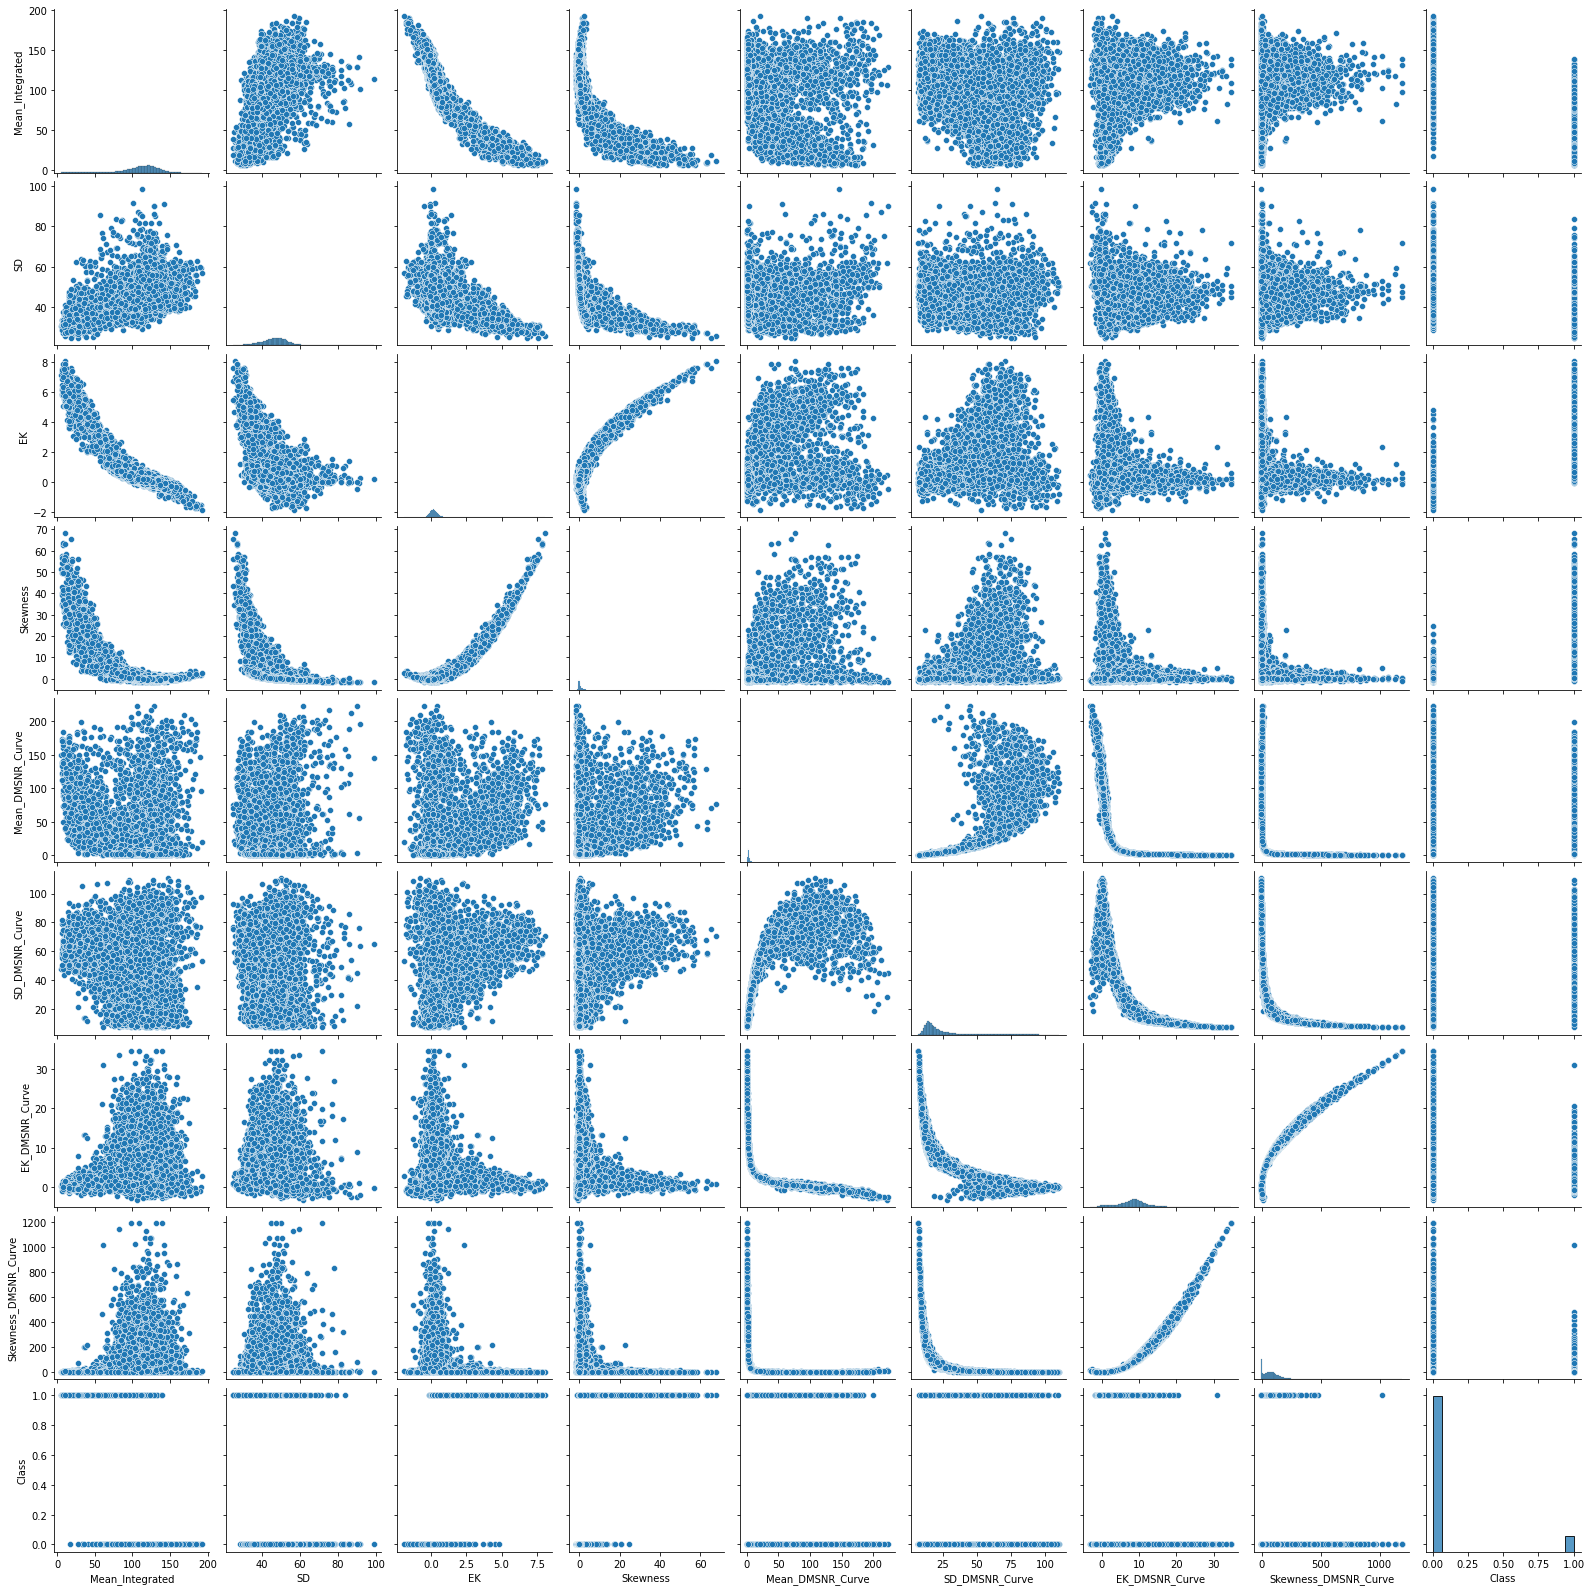

In [46]:
sns.pairplot(pulsar)

In [47]:
# After studying the data, I decided to find the original data set and start the project from scratch with that. 
# The NaN and differences between the column titles gave me reason to be concerned. 

In [48]:
# For citation purposes, this dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/HTRU2
# R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar
# Candidate Selection: From simple filters to a new principled real-time classification approach
# MNRAS, 2016.

In [49]:
# Since the dataset didn't have column names, I had two add those.
# The abbreviated column names stand for
# mean of the integrated profile, standard deviation of the integrated profile, 
# excess kurtosis of the intergrated profile, skewness of the integrated profile, 
# mean of the DM-SNR curve, standard deviation of the DM-SNR curve, 
# excess kurtosis of the DM-SNR curve, skewness of the DM-SNR curve, and class.  

In [50]:
pulsar_column = ["Mean IP", "SD IP", "EK IP", "SK IP", "Mean DM-SNR", "SD DM-SNR", "EK DM-SNR", "SK DM-SNR", "Class"]

In [51]:
pulsars = pd.read_csv("HTRU_2.csv", names=pulsar_column)

In [52]:
pulsars.head()

,Mean IP,SD IP,EK IP,SK IP,Mean DM-SNR,SD DM-SNR,EK DM-SNR,SK DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [53]:
# Double checking to make sure there are no null values. 

In [54]:
pulsars.isnull().sum()

Mean IP        0
SD IP          0
EK IP          0
SK IP          0
Mean DM-SNR    0
SD DM-SNR      0
EK DM-SNR      0
SK DM-SNR      0
Class          0
dtype: int64

In [55]:
pulsars.dtypes

Mean IP        float64
SD IP          float64
EK IP          float64
SK IP          float64
Mean DM-SNR    float64
SD DM-SNR      float64
EK DM-SNR      float64
SK DM-SNR      float64
Class            int64
dtype: object

In [56]:
# Everything looks good and the data is ready for the machine learning model. 
# The pulsar_train, pulsar_test, and pulsar datasets will be disregarded and I will use the pulsars dataset. 

In [57]:
# Resuming data wrangling and exploration. 

array([[<AxesSubplot:title={'center':'Mean IP'}>,
        <AxesSubplot:title={'center':'SD IP'}>,
        <AxesSubplot:title={'center':'EK IP'}>],
       [<AxesSubplot:title={'center':'SK IP'}>,
        <AxesSubplot:title={'center':'Mean DM-SNR'}>,
        <AxesSubplot:title={'center':'SD DM-SNR'}>],
       [<AxesSubplot:title={'center':'EK DM-SNR'}>,
        <AxesSubplot:title={'center':'SK DM-SNR'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

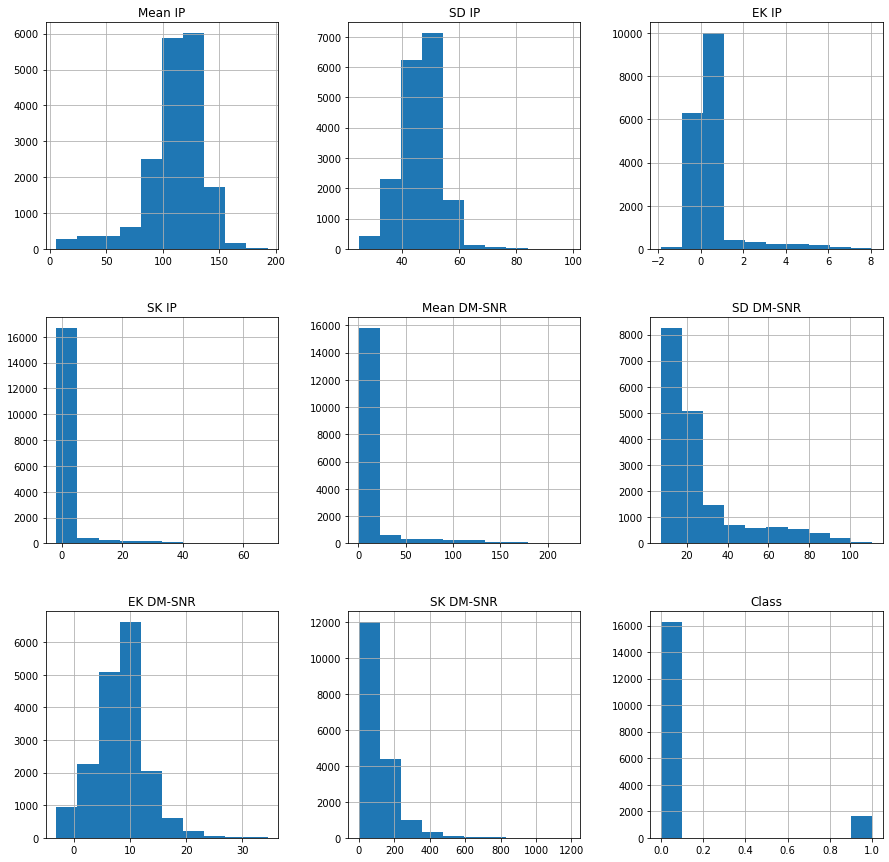

In [58]:
pulsars.hist(figsize=(15,15))

In [59]:
corrPearson = pulsars.corr(method="pearson")

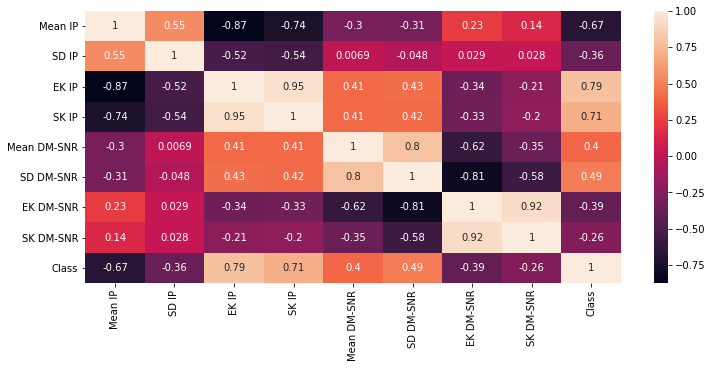

In [124]:
figure = plt.figure(figsize=(12,5))
sns.heatmap(corrPearson,annot=True)
plt.show()

# Testing assumptions for logistic regression

# Assumptions will be tested in R

# Creating the machine learning model

In [61]:
# Data wrangling

In [62]:
x = pulsars[["Mean IP", "SD IP", "EK IP", "SK IP", "Mean DM-SNR", "SD DM-SNR", "EK DM-SNR", "SK DM-SNR"]]

In [63]:
y = pulsars['Class']

In [64]:
# Train Test Split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=101)

In [66]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(12528, 8) (12528,)
(5370, 8) (5370,)


In [67]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [68]:
predictions = lm.predict(x_test)
predictions

array([ 0.11218232,  0.26247632,  0.09033547, ..., -0.10097988,
        0.17484375, -0.00261719])

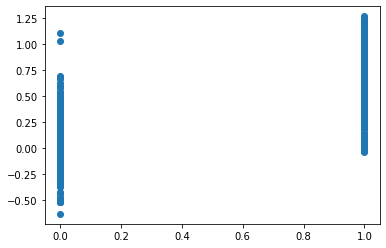

In [69]:
plt.scatter(y_test, predictions)

In [70]:
print("Score" ,lm.score(x_test, y_test))

Score 0.6933485858180648


In [71]:
# Mean Absolute Error

In [72]:
metrics.mean_absolute_error(y_test, predictions)

0.09320791286106006

In [73]:
# Mean Squared Error

In [74]:
metrics.mean_squared_error(y_test, predictions)

0.02453718554957046

In [75]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.15664349826778787

In [76]:
# According to the stepwise regression testing I did in R, you can remove SD IP, EK DM-SNR, and SK DM-SNR
# from the model without significantly affecting accuracy or RMSE. 

In [77]:
x = pulsars[["Mean IP", "EK IP", "SK IP", "Mean DM-SNR", "SD DM-SNR"]]

In [78]:
y = pulsars['Class']

# Train Test Split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=101)

# Trying a single decision tree

In [80]:
decisionTree = DecisionTreeClassifier(random_state=101)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=101)

In [81]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[4813   86]
 [  64  407]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4899
           1       0.83      0.86      0.84       471

    accuracy                           0.97      5370
   macro avg       0.91      0.92      0.91      5370
weighted avg       0.97      0.97      0.97      5370



In [82]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(12528, 5) (12528,)
(5370, 5) (5370,)


In [83]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [84]:
predictions = lm.predict(x_test)
predictions

array([ 0.11195635,  0.26500701,  0.07524893, ..., -0.10311405,
        0.17673033,  0.00667078])

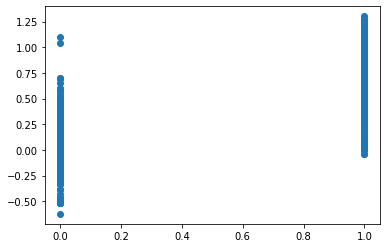

In [85]:
plt.scatter(y_test, predictions)

In [86]:
print("Score" ,lm.score(x_test, y_test))

Score 0.6925636465313361


In [87]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.15684385125477518

In [88]:
# According to this model, standard deviation of the integrated profile, excess kurtosis of the DM-SNR curve, 
# and skewness of the DM-SNR curve have little impact on whether an object is a pulsar. 

# Trying something else
# I think I can increase the accuracy of the model, and I'll clean this up if it works.

# After studying the data, I decided to find the original data set and start the project from scratch with that. 
# The NaN and differences between the column titles gave me reason to be concerned. 

# For citation purposes, this dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/HTRU2
# R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach MNRAS, 2016.

# Since the dataset didn't have column names, I had to add those.
# The abbreviated column names stand for mean of the integrated profile, standard deviation of the integrated profile, excess kurtosis of the intergrated profile, skewness of the integrated profile, mean of the DM-SNR curve, standard deviation of the DM-SNR curve,  excess kurtosis of the DM-SNR curve, skewness of the DM-SNR curve, and class.  

 # Importing the dataset

In [135]:
pulsar_column = ["Mean IP", "SD IP", "EK IP", "SK IP", "Mean DM-SNR", "SD DM-SNR", "EK DM-SNR", "SK DM-SNR", "Class"]

In [136]:
pulsars = pd.read_csv("HTRU_2.csv", names=pulsar_column)

In [127]:
pulsars.shape

(17898, 9)

# Taking a look at the data and data wrangling

In [128]:
pulsars

,Mean IP,SD IP,EK IP,SK IP,Mean DM-SNR,SD DM-SNR,EK DM-SNR,SK DM-SNR,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# Counting NaN values

In [129]:
pulsars.isnull().sum()

Mean IP        0
SD IP          0
EK IP          0
SK IP          0
Mean DM-SNR    0
SD DM-SNR      0
EK DM-SNR      0
SK DM-SNR      0
Class          0
dtype: int64

# There are no NaN values, so I don't have to replace any missing data.

# Checking data types for each variable

In [130]:
pulsars.dtypes

Mean IP        float64
SD IP          float64
EK IP          float64
SK IP          float64
Mean DM-SNR    float64
SD DM-SNR      float64
EK DM-SNR      float64
SK DM-SNR      float64
Class            int64
dtype: object

# All variables are numeric and are either floats or integers, so no further wrangling is necessary.

# Describe the data sets

In [132]:
pulsars.describe()

,Mean IP,SD IP,EK IP,SK IP,Mean DM-SNR,SD DM-SNR,EK DM-SNR,SK DM-SNR,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


# Exploratory analysis

array([[<AxesSubplot:title={'center':'Mean_Integrated'}>,
        <AxesSubplot:title={'center':'SD'}>,
        <AxesSubplot:title={'center':'EK'}>],
       [<AxesSubplot:title={'center':'Skewness'}>,
        <AxesSubplot:title={'center':'Mean_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'SD_DMSNR_Curve'}>],
       [<AxesSubplot:title={'center':'EK_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'Skewness_DMSNR_Curve'}>,
        <AxesSubplot:title={'center':'Class'}>]], dtype=object)

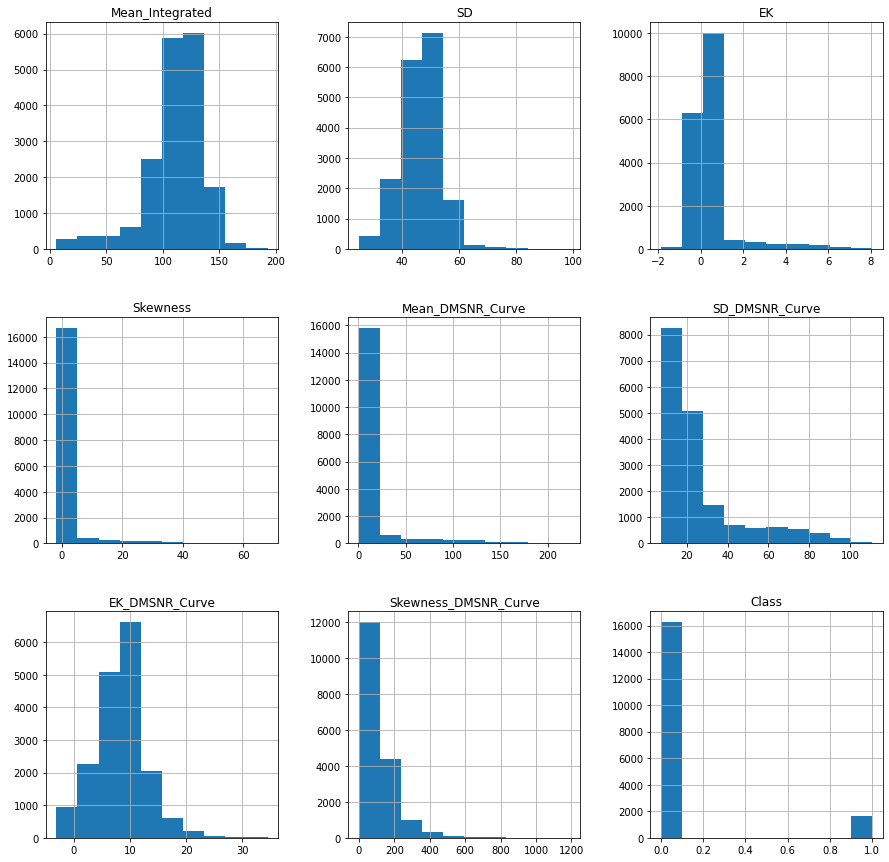

In [133]:
pulsar.hist(figsize=(15,15))

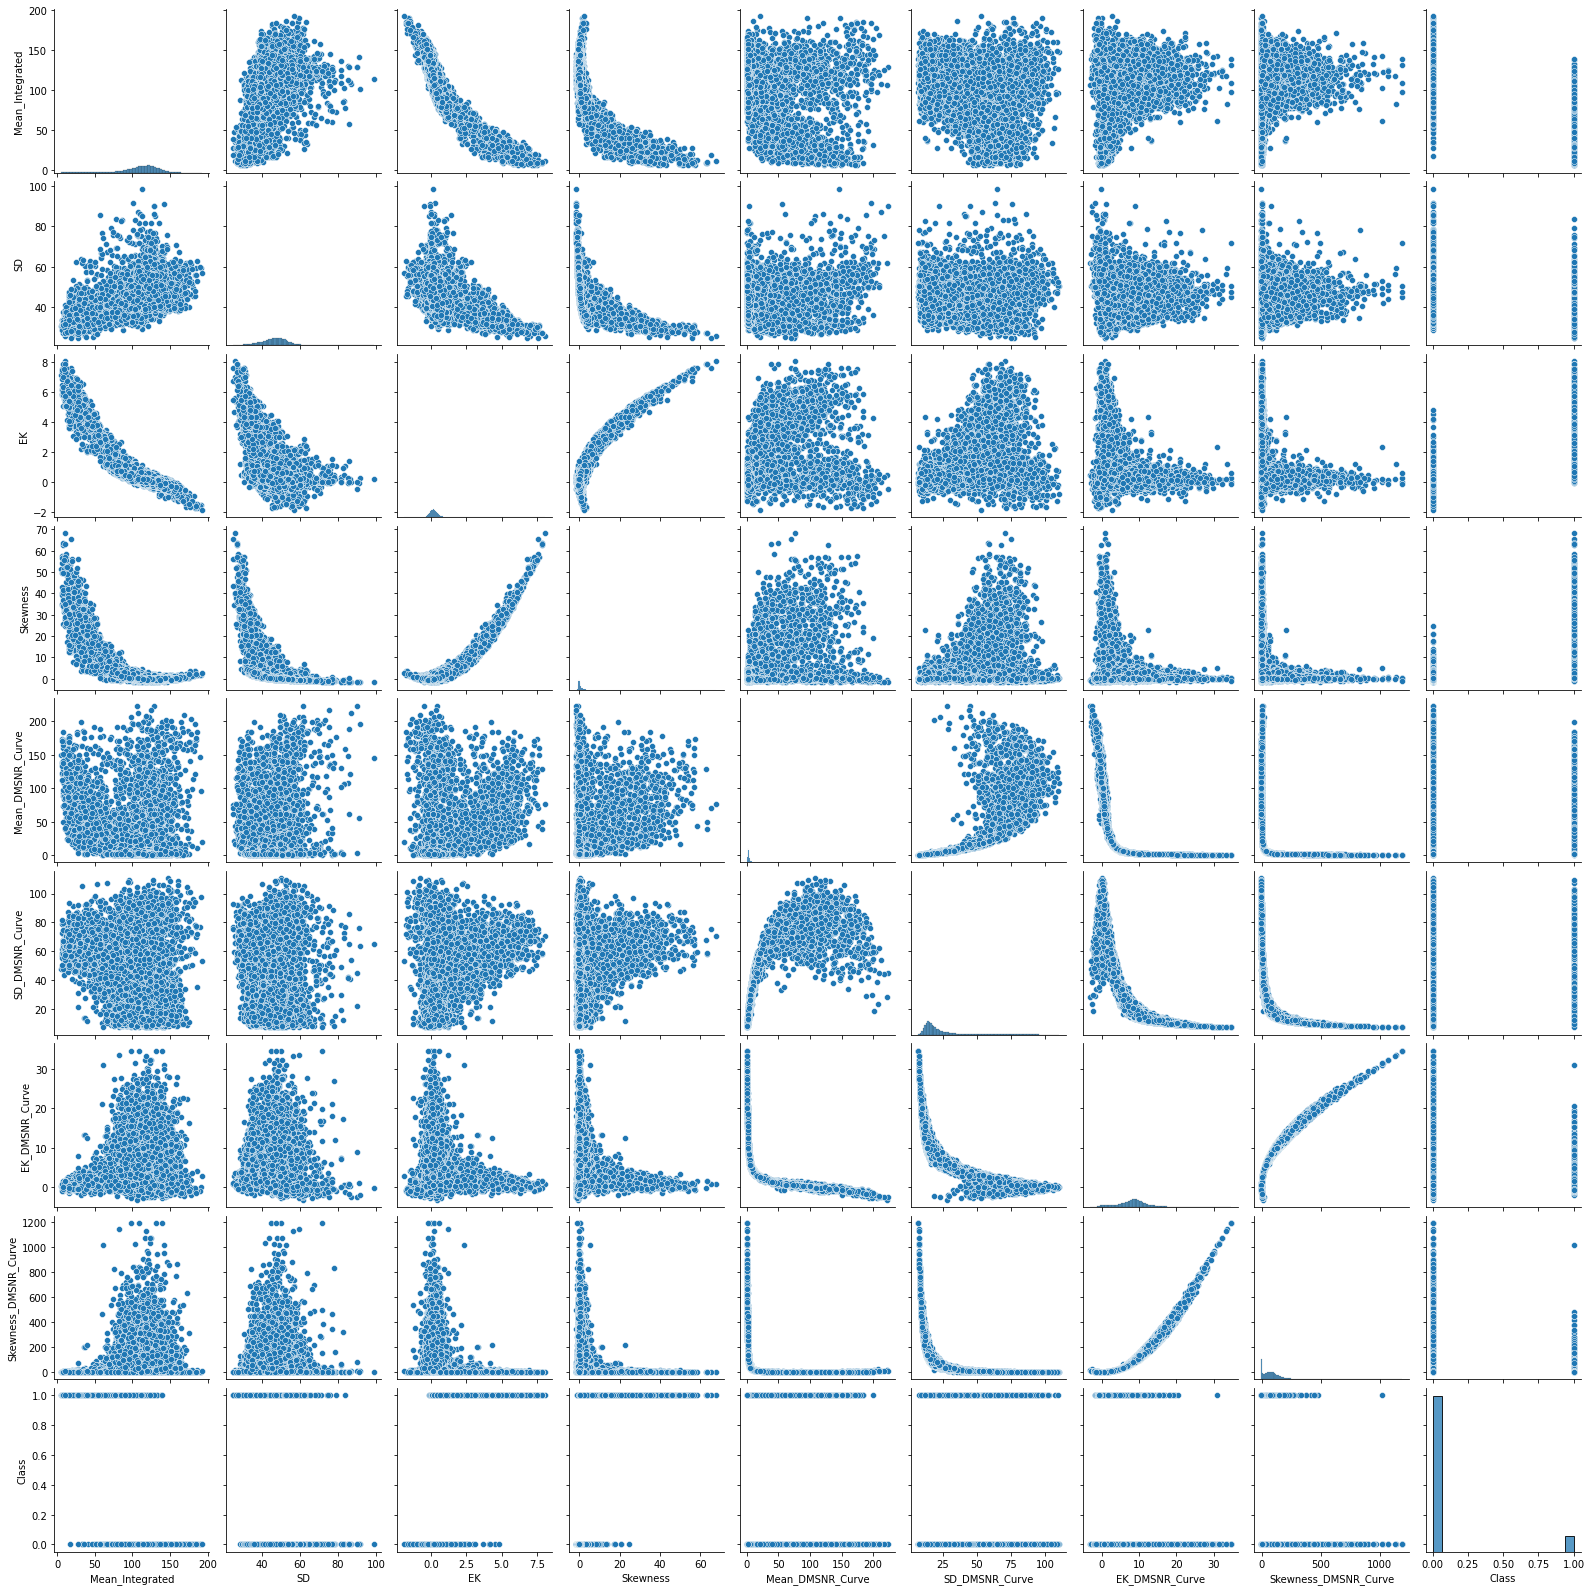

In [134]:
sns.pairplot(pulsar)

In [137]:
corrPearson = pulsars.corr(method="pearson")

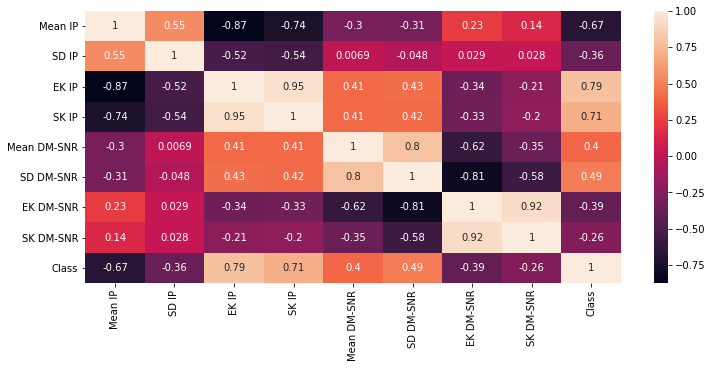

In [138]:
figure = plt.figure(figsize=(12,5))
sns.heatmap(corrPearson, annot=True)
plt.show()

# Setting up the machine learning model.
# Setting x and y 

In [90]:
x = pulsars.drop('Class', axis=1)
y = pulsars['Class']

# Train, test, split

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

# Trying a single decision tree

In [140]:
decisionTree = DecisionTreeClassifier(random_state=101)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=101)

In [141]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[4820   79]
 [  72  399]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4899
           1       0.83      0.85      0.84       471

    accuracy                           0.97      5370
   macro avg       0.91      0.92      0.91      5370
weighted avg       0.97      0.97      0.97      5370



In [ ]:
# Precision and accuracy are good, but could be better. 
# Next, I'll try the random forest.

In [92]:
forest = RandomForestClassifier(n_estimators=500, random_state=101)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=101)

In [110]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[4871   28]
 [  67  404]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4899
           1       0.94      0.86      0.89       471

    accuracy                           0.98      5370
   macro avg       0.96      0.93      0.94      5370
weighted avg       0.98      0.98      0.98      5370



# Hyperparameter Tuning

1 : 0.9670391061452513
4 : 0.9789571694599628
5 : 0.9800744878957169
8 : 0.9806331471135941
10 : 0.9802607076350093
20 : 0.9824953445065177
50 : 0.9834264432029796
75 : 0.9830540037243948
100 : 0.9830540037243948
250 : 0.9828677839851024
500 : 0.9824953445065177


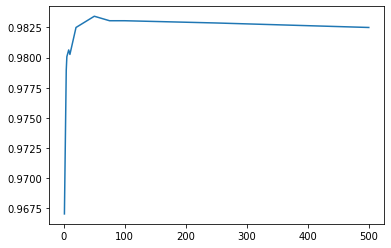

In [94]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=101)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)
    
plt.plot(n_estimators_array, results)

# The model looks the most accurate when using 50 trees. 

In [95]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [102]:
rf = RandomForestClassifier(n_estimators=50)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=101)

In [117]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=50),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=101)

In [114]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30}

In [115]:
forest = RandomForestClassifier(n_estimators=50, min_samples_leaf=4, max_features="log2", max_depth=30)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=4,
                       n_estimators=50)

In [116]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[4872   27]
 [  64  407]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4899
           1       0.94      0.86      0.90       471

    accuracy                           0.98      5370
   macro avg       0.96      0.93      0.95      5370
weighted avg       0.98      0.98      0.98      5370



# After running hyperparameter tuning, I found that the model is the most accurate when the number of trees = 50, the min_samples_leaf = 4, max_features = log2, and max_depth = 30.

# Feature Importance

# Using stepwise regression to determine which variables are the most important doesn't work with machine learning, so feature importance can be run.

In [122]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances
feature_importances.sort_values(inplace=True, ascending=True)
print(feature_importances)

SK DM-SNR      0.017781
EK DM-SNR      0.022580
SD IP          0.027023
SD DM-SNR      0.053458
Mean DM-SNR    0.057656
Mean IP        0.171987
SK IP          0.323874
EK IP          0.325641
dtype: float64


<AxesSubplot:>

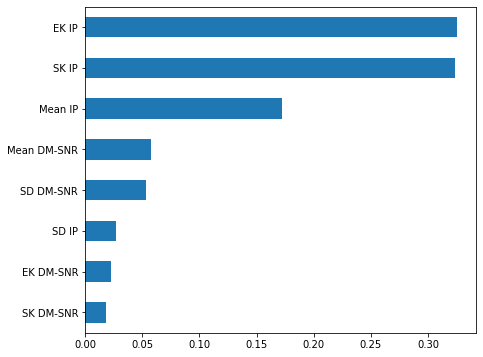

In [123]:
feature_importances.plot(kind='barh', figsize=(7,6))